In [1]:
import pandas as pd
import numpy as np

In [2]:
data = pd.read_csv('/content/drive/MyDrive/MLdatasets/Synthetic_Financial_datasets_log.csv')
data.head(5)

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [ ]:
data.shape

(1048575, 11)

In [ ]:
data.isnull().sum()

,0
step,0
type,0
amount,0
nameOrig,0
oldbalanceOrg,0
newbalanceOrig,0
nameDest,0
oldbalanceDest,0
newbalanceDest,0
isFraud,0


In [ ]:
data.dtypes

,0
step,int64
type,object
amount,float64
nameOrig,object
oldbalanceOrg,float64
newbalanceOrig,float64
nameDest,object
oldbalanceDest,float64
newbalanceDest,float64
isFraud,int64


In [ ]:
# No. of unique values of each fatures
data.nunique()

,0
step,95
type,5
amount,1009606
nameOrig,1048317
oldbalanceOrg,391033
newbalanceOrig,440792
nameDest,449635
oldbalanceDest,590110
newbalanceDest,437054
isFraud,2


**DATA PREPROCESSING**

In [ ]:
# Removing unnecesary data features
data = data.drop(columns=['nameOrig','nameDest'],axis=1)
data.head(5)

,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,170136.0,160296.36,0.0,0.0,0,0
1,1,PAYMENT,1864.28,21249.0,19384.72,0.0,0.0,0,0
2,1,TRANSFER,181.00,181.0,0.00,0.0,0.0,1,0
3,1,CASH_OUT,181.00,181.0,0.00,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,41554.0,29885.86,0.0,0.0,0,0


In [ ]:
# Applying label encoding to on type 'feature'
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
data['step'] = le.fit_transform(data['step'])
data['type'] = le.fit_transform(data['type'])
data.head(5)

,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,0,3,9839.64,170136.0,160296.36,0.0,0.0,0,0
1,0,3,1864.28,21249.0,19384.72,0.0,0.0,0,0
2,0,4,181.00,181.0,0.00,0.0,0.0,1,0
3,0,1,181.00,181.0,0.00,21182.0,0.0,1,0
4,0,3,11668.14,41554.0,29885.86,0.0,0.0,0,0


In [ ]:
# Normlization
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
numerical_features = ['step','amount','oldbalanceOrg','newbalanceOrig','oldbalanceDest','newbalanceDest']
data[numerical_features] = scaler.fit_transform(data[numerical_features])
data

,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,0.0,3,0.000984,0.004374,0.004121,0.000000,0.000000,0,0
1,0.0,3,0.000186,0.000546,0.000498,0.000000,0.000000,0,0
2,0.0,4,0.000018,0.000005,0.000000,0.000000,0.000000,1,0
3,0.0,1,0.000018,0.000005,0.000000,0.000503,0.000000,1,0
4,0.0,3,0.001167,0.001068,0.000768,0.000000,0.000000,0,0
...,...,...,...,...,...,...,...,...,...
1048570,1.0,1,0.013256,0.012334,0.008927,0.011504,0.014618,0,0
1048571,1.0,3,0.000992,0.002328,0.002073,0.000000,0.000000,0,0
1048572,1.0,3,0.001414,0.000528,0.000165,0.000000,0.000000,0,0
1048573,1.0,3,0.001002,0.002329,0.002072,0.000000,0.000000,0,0


In [ ]:
# Features
X = data.drop(columns=['isFraud'],axis=1)
print(X.shape)
X

(1048575, 8)


,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFlaggedFraud
0,0.0,3,0.000984,0.004374,0.004121,0.000000,0.000000,0
1,0.0,3,0.000186,0.000546,0.000498,0.000000,0.000000,0
2,0.0,4,0.000018,0.000005,0.000000,0.000000,0.000000,0
3,0.0,1,0.000018,0.000005,0.000000,0.000503,0.000000,0
4,0.0,3,0.001167,0.001068,0.000768,0.000000,0.000000,0
...,...,...,...,...,...,...,...,...
1048570,1.0,1,0.013256,0.012334,0.008927,0.011504,0.014618,0
1048571,1.0,3,0.000992,0.002328,0.002073,0.000000,0.000000,0
1048572,1.0,3,0.001414,0.000528,0.000165,0.000000,0.000000,0
1048573,1.0,3,0.001002,0.002329,0.002072,0.000000,0.000000,0


MODEL TRAINING

In [ ]:

import matplotlib.pyplot as plt
from sklearn.cluster import MiniBatchKMeans
inertia = []
k_range = range(1,11)

for k in k_range:
  kmeans = MiniBatchKMeans(n_clusters=k,batch_size=1000,random_state=42)
  kmeans.fit(X)
  inertia.append(kmeans.inertia_)


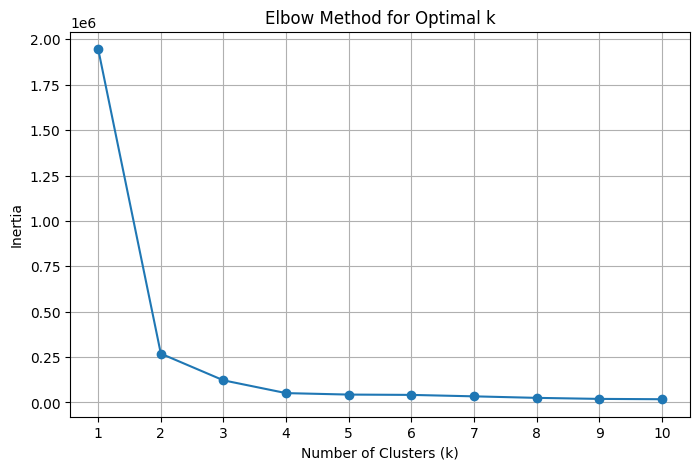

In [ ]:
plt.figure(figsize=(8, 5))
plt.plot(k_range, inertia, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.xticks(k_range)
plt.grid()
plt.show()

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
X_new = pca.fit_transform(X)
# X = pd.DataFrame(X_new,columns=['PC1','PC2','PC3'])
X_new

array([[ 1.28650934, -0.27860494],
       [ 1.28665643, -0.27859342],
       [ 2.28624279, -0.28068089],
       ...,
       [ 1.28867136,  0.72136326],
       [ 1.28859738,  0.72136116],
       [ 1.28860847,  0.7213611 ]])

In [ ]:
# K-Means algorithm
from sklearn.cluster import MiniBatchKMeans
kmeans = MiniBatchKMeans(n_clusters=2,batch_size=1000,random_state=42)
kmeans.fit(X)

MiniBatchKMeans(batch_size=1000, n_clusters=2, random_state=42)

In [ ]:
distances = kmeans.transform(X).min(axis=1)
distances

array([0.33301233, 0.33303208, 0.869384  , ..., 0.74083555, 0.74083826,
       0.740836  ])

In [ ]:
# Define a threshold for anomaly based on the distance like 99th percentile
threshold = np.percentile(distances,99)
anomalies_kmeans = X[distances > threshold]
print(anomalies_kmeans.shape)
anomalies_kmeans

(10486, 8)


,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFlaggedFraud
9,0.0,2,0.000534,0.001072,0.000935,0.000995,0.000956,0
10,0.0,2,0.000964,0.000115,0.000000,0.000258,0.003744,0
21,0.0,2,0.000930,0.000290,0.000051,0.000709,0.000400,0
22,0.0,2,0.000107,0.000047,0.000019,0.000245,0.000000,0
41,0.0,2,0.000576,0.000838,0.000690,0.004981,0.000403,0
...,...,...,...,...,...,...,...,...
1048515,1.0,4,0.016928,0.003621,0.000000,0.000000,0.004011,0
1048546,1.0,2,0.000237,0.000007,0.000000,0.015842,0.015861,0
1048549,1.0,2,0.000998,0.000026,0.000000,0.055628,0.055732,0
1048561,1.0,2,0.000788,0.000809,0.000607,0.444181,0.443128,0


In [ ]:
kmeans_labels = kmeans.predict(X)
kmeans_labels

array([0, 0, 0, ..., 0, 0, 0], dtype=int32)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but PCA was fitted with feature names
  warnings.warn(


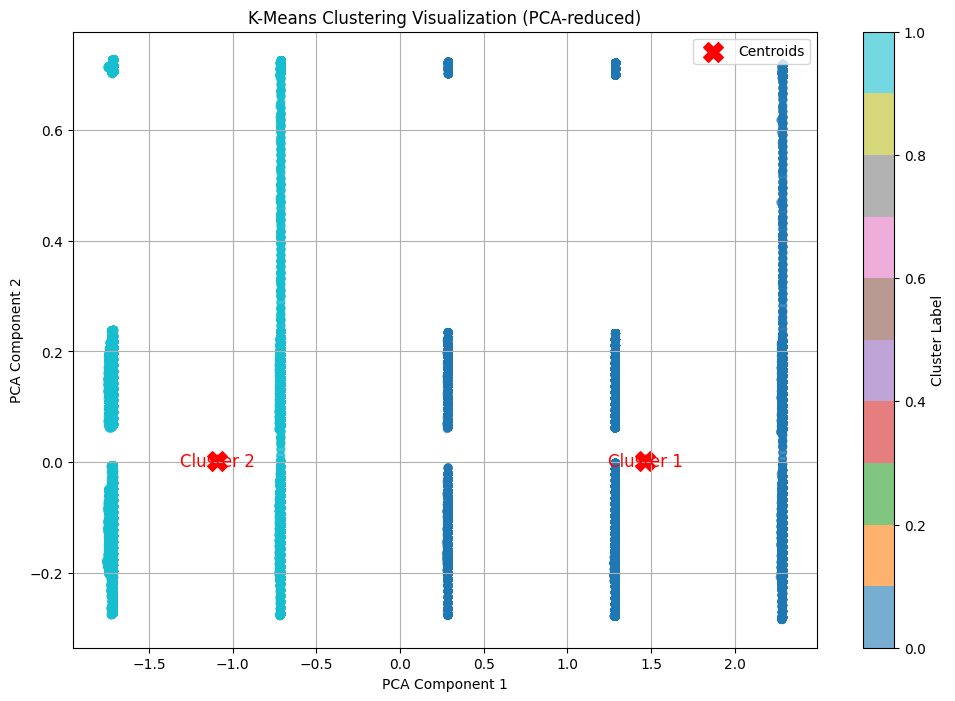

In [ ]:
kmeans_labels = kmeans.predict(X)
centroids = pca.transform(kmeans.cluster_centers_)

# Plot the clusters with unique colors
plt.figure(figsize=(12, 8))
scatter = plt.scatter(X_new[:, 0], X_new[:, 1], c=kmeans_labels, cmap='tab10', s=30, alpha=0.6)

# Highlight centroids with a larger red 'X'
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', marker='X', s=200, label="Centroids")

# Optional: Annotate clusters by placing the label near each centroid
for i, center in enumerate(centroids):
    plt.text(center[0], center[1], f"Cluster {i+1}", color="red", fontsize=12, ha='center', va='center')

# Add color bar, title, labels, and legend
plt.colorbar(scatter, label="Cluster Label")
plt.title("K-Means Clustering Visualization (PCA-reduced)")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
# Evaluation of kmeans algorithm
from sklearn.metrics import silhouette_score

score = silhouette_score(X[0:40000],kmeans_labels[0:40000])
score

0.8258041500890646

In [ ]:
# Data visualization
score

0.8258041500890646

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [ ]:
pca = PCA(n_components=2)
x_pca = pca.fit_transform(X_scaled)

**ISOLATION FOREST**

In [ ]:
from sklearn.ensemble import IsolationForest
iso = IsolationForest(contamination=0.01,random_state=42)
iso.fit(X_scaled)

IsolationForest(contamination=0.01, random_state=42)

In [ ]:
data['anomaly'] = iso.predict(X_scaled)

In [ ]:
anomalies_iso = data[data['anomaly']==-1]
anomalies_iso

,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,anomaly
89,0.0,4,0.142905,0.000000,0.000000,0.048493,0.454976,0,0,-1
94,0.0,4,0.172489,0.000000,0.000000,0.082437,0.454976,0,0,-1
358,0.0,4,0.153820,0.000000,0.000000,0.165735,0.454976,0,0,-1
359,0.0,4,0.242158,0.000000,0.000000,0.202272,0.454976,0,0,-1
362,0.0,4,0.145721,0.000000,0.000000,0.258907,0.454976,0,0,-1
...,...,...,...,...,...,...,...,...,...,...
1048011,1.0,4,0.133984,0.000000,0.000000,0.748219,0.777251,0,0,-1
1048027,1.0,4,0.357250,0.000000,0.000000,0.091094,0.175535,0,0,-1
1048082,1.0,4,0.290534,0.001071,0.000000,0.180353,0.248815,0,0,-1
1048139,1.0,4,0.164298,0.005582,0.000000,0.045336,0.084162,0,0,-1


In [ ]:
# shape of anomalies_iso
anomalies_iso.shape[0]

10486

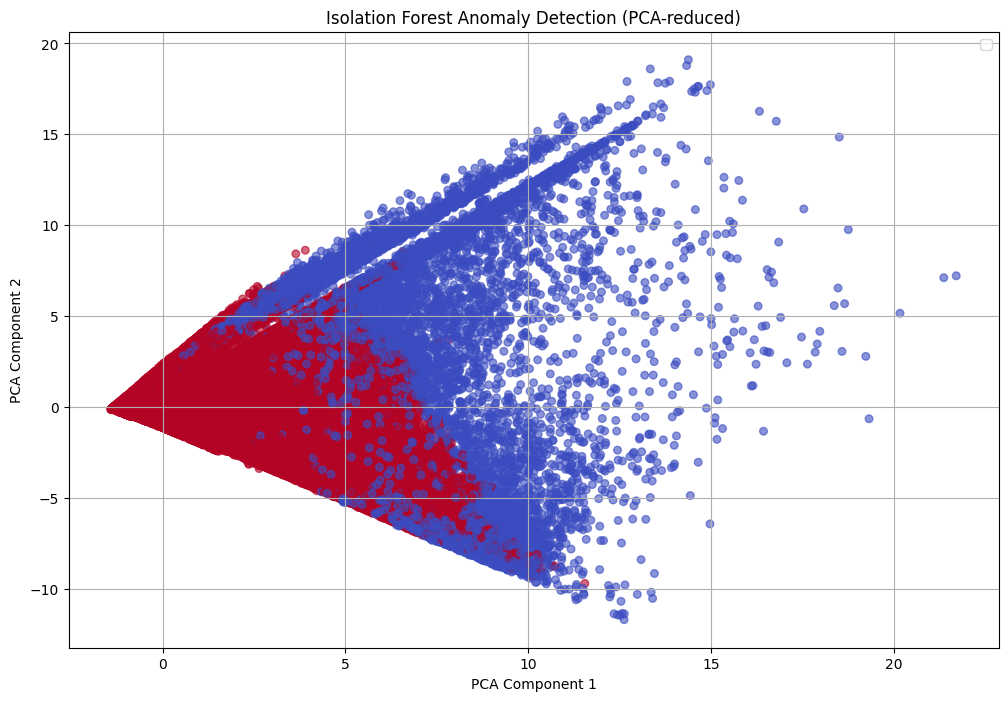

In [ ]:
from matplotlib import pyplot as plt
plt.figure(figsize=(12,8))
plt.scatter(x_pca[:, 0], x_pca[:, 1], c=data['anomaly'], cmap='coolwarm', s=30, alpha=0.6)
plt.title("Isolation Forest Anomaly Detection (PCA-reduced)")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
data['predicted_fraud'] = np.where(data['anomaly']==-1,1,0)
true_labels = data['isFlaggedFraud']

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(classification_report(true_labels,data['predicted_fraud']))
print(confusion_matrix(true_labels,data['predicted_fraud']))
print(accuracy_score(true_labels,data['predicted_fraud']))

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


              precision    recall  f1-score   support

           0       1.00      0.99      0.99   1048575
           1       0.00      0.00      0.00         0

    accuracy                           0.99   1048575
   macro avg       0.50      0.49      0.50   1048575
weighted avg       1.00      0.99      0.99   1048575

[[1038089   10486]
 [      0       0]]
0.9899997615811935


**DBSCAN**

In [ ]:
from sklearn.cluster import DBSCAN
dbscan = DBSCAN(eps=0.5,min_samples=5)
# Fit the model to scaled data
data['anomaly'] = dbscan.fit_predict(X_scaled)
data['predicted_fraud'] = np.where(data['anomaly']==-1,1,0)

In [ ]:
# Evaluation
true_labels = data['isFlaggedFraud']
print(classification_report(true_labels,data['predicted_fraud']))
print(confusion_matrix(true_labels,data['predicted_fraud']))
print(accuracy_score(true_labels,data['predicted_fraud']))

In [ ]:
# Visualtzation of anomalies
plt.figure(figsize=(12,8))

# Scatter plot of features
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=data['predicted_fraud'], cmap='coolwarm', s=30, alpha=0.6)

# Highlight anomalies with larger red 'X'
plt.scatter(X_scaled[data['predicted_fraud']==1,0],X_scaled[data['predicted_fraud']==1,0],c='red',marker='X',s=200,label='Predicted Anomalies')

plt.title("DBSCAN Anomaly Detection")
plt.xlabel("Feature 1 (Standarization)")
plt.ylabel("Feature 2 (Standarization)")
plt.legend()
plt.grid(True)
plt.show()